# Learning a Sine Function with a feed forward NNet in ScikitLearn

Here we show how to learn a sine function using feed-forward neural nets in scikitlearn.

We explore how different optimizers perform

In [37]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

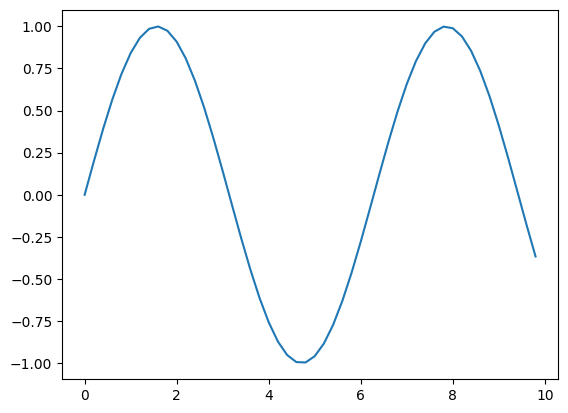

In [59]:
X_train = np.arange(0, 10, 0.2)
n_samples = len(X_train)
X_train = X_train.reshape(n_samples,1)

# target
y_train = np.sin(X_train).reshape(n_samples,1)

#Noise
mu, sigma = 0, 0.0
noise = np.random.normal(loc=mu, scale=sigma, size=n_samples).reshape(n_samples,1)

y_train = y_train + noise

plt.plot(X_train, y_train)
plt.show()

In [60]:
width = 100
hidden_layer_sizes = tuple([width]*5)
learning_rate = 'constant'
learning_rate_init = 0.01

regr = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                   solver='sgd',
                   batch_size=n_samples,
                   learning_rate=learning_rate,
                   learning_rate_init=learning_rate_init).fit(X_train, y_train)

y_pred = regr.predict(X_train)

/Users/halmagyi/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


loss 0.08119914006544189


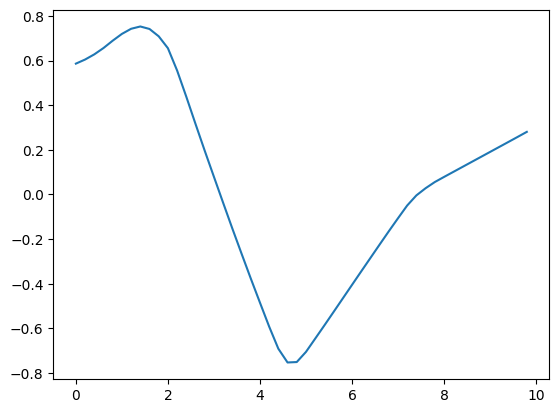

In [61]:
print('loss', mean_squared_error(y_pred, y_true))
plt.plot(X_train, y_pred)
plt.show()

# Optimizer = adam

We get a much better result with the adam optimizer

In [62]:
width = 400
hidden_layer_sizes = tuple([width]*8)
learning_rate = 'constant'
learning_rate_init = 0.001

regr = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                   solver='adam',
                   batch_size=n_samples,
                   learning_rate=learning_rate,
                   learning_rate_init=learning_rate_init).fit(X_train, y_train)

y_pred = regr.predict(X_train)

/Users/halmagyi/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


loss 0.03962191290717772


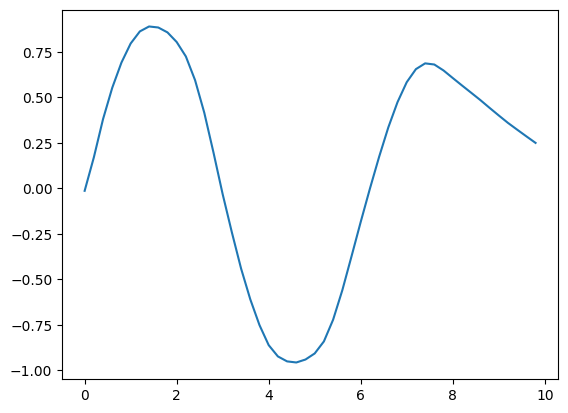

In [63]:
print('loss', mean_squared_error(y_pred, y_true))
plt.plot(X_train, y_pred)
plt.show()